<a href="https://colab.research.google.com/github/ferdianpradana/ferdianpradana-Penerapan-K-Means-Clustering-pada-ulasan-aplikasi-shopee/blob/main/Shope_Riview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muliasijabat/dataset-shoppe-id")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dataset-shoppe-id


In [6]:
# Memberi alamat file
dataset_path = "/kaggle/input/dataset-shoppe-id/Shopee_IDN_PlayStore.xlsx"
df = pd.read_excel(dataset_path)

In [7]:
# Melihat apakah dataset terbaca
print(df.columns)

# menampilkan 10 baris untuk cek
df.head(10)

Index(['content'], dtype='object')


,content
0,"Shopee bikin kecewa, puluhan paket ku kandas d..."
1,"Sebelum diupdate aplikasi berjalan normal,tapi..."
2,Buat yang suka belanja bisa manfaatkan shoope ...
3,"Jaringan bagus & stabil sampai 25Mbps, hp juga..."
4,Habis di-update malah makin parah. Jaringan da...
5,"Aplikasi semakin lemot, jaringan bagus dengan ..."
6,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...
7,Saya menunggu pesanan saya setengah bulan lebi...
8,Shopee dari dulu ngga ada perubahan sama sekal...
9,Di bandingin online shop yg lain saya lebih me...


In [8]:
# 4. Ambil Kolom content dan tidak ada nilai NaN
sentences = df['content'].dropna()
print("Jumlah baris dan kolom:", sentences.shape)





Jumlah baris dan kolom: (1000,)


In [9]:
# 5. TF-IDF Vectorization

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_documents = vectorizer.fit_transform(sentences)

print(vectorized_documents)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35284 stored elements and shape (1000, 5028)>
  Coords	Values
  (0, 4229)	0.058196516543569506
  (0, 712)	0.12578294541136661
  (0, 2065)	0.22298136602748198
  (0, 3778)	0.20518400349540925
  (0, 3369)	0.10917643674302818
  (0, 2347)	0.17444861934011247
  (0, 1987)	0.24203504820790955
  (0, 1151)	0.24203504820790955
  (0, 4428)	0.16516821176689572
  (0, 2491)	0.14800118402523102
  (0, 4132)	0.17444861934011247
  (0, 2465)	0.09381270034691808
  (0, 994)	0.0990508413460291
  (0, 1466)	0.15119819878080387
  (0, 4517)	0.07521500860798455
  (0, 535)	0.25156589082273323
  (0, 1938)	0.08243983354731851
  (0, 3941)	0.10761600346381739
  (0, 3353)	0.07994372863101726
  (0, 1400)	0.10227148644174057
  (0, 270)	0.24203504820790955
  (0, 3919)	0.12091306657293088
  (0, 4080)	0.10124718497711249
  (0, 1953)	0.20518400349540925
  (0, 3708)	0.17444861934011247
  :	:
  (999, 1000)	0.26178911693281837
  (999, 478)	0.11523197831868313
  (999,

In [10]:
# 6. Reduksi Dimensi untuk Visualisasi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())


In [11]:
# 7. K-Means Clustering
num_clusters = 3  #jumlah cluster dapat di ubah
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

In [12]:
# 8. Simpan hasil clustering
results = pd.DataFrame()
results['content'] = sentences.values
results['cluster'] = kmeans.labels_

print(results.sample(10))


                                               content  cluster
599  Di list bagian 'Rekomendasi' ... VIDEO IKLAN t...        2
533  Maaf saya beri bintang 1 saolnya mau belanja m...        0
304  Tidak ada kejelasan setelah saya komplen saldo...        1
781  Aplikasinya jelek banget dah. Massa iya beli b...        0
956  Saya sangat kecewa, saya sudah pesan barang me...        1
434  Setelah dua paket yg di kembalikan ke seller,r...        1
681  Dalam hal kualitas, barang hampir Ori semua. N...        2
828  Sangat baik tapi sayang setiap bika aplikasiny...        2
959  Paket sudah di kecamatan yg sama, 10 hari lebi...        1
29   Aplikasi lemot bahkan ngereset sendiri, udah n...        0


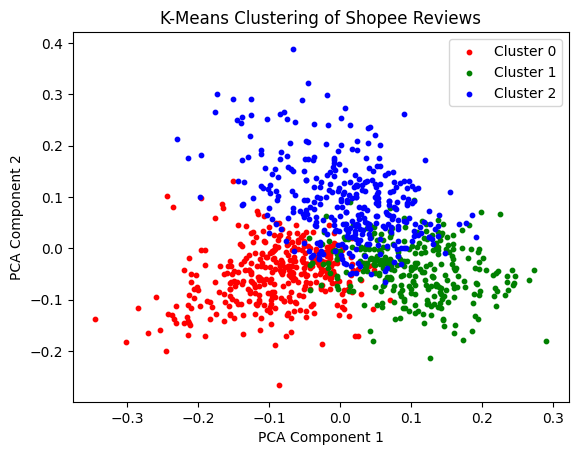

In [13]:
# 9. Visualisasi cluster
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10,
                color=colors[i % len(colors)],
                label=f'Cluster {i}')

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Shopee Reviews')
plt.show()
